<a href="https://colab.research.google.com/github/musical-shyam/CS-536-ML-Projects/blob/main/Assignment-2/Flowers_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS 536 Intro to ML: Assignment 2**

## **Installing and Importing the Required Libraries**

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## **Importing the Dataset and Data Preprocessing**

In [ ]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

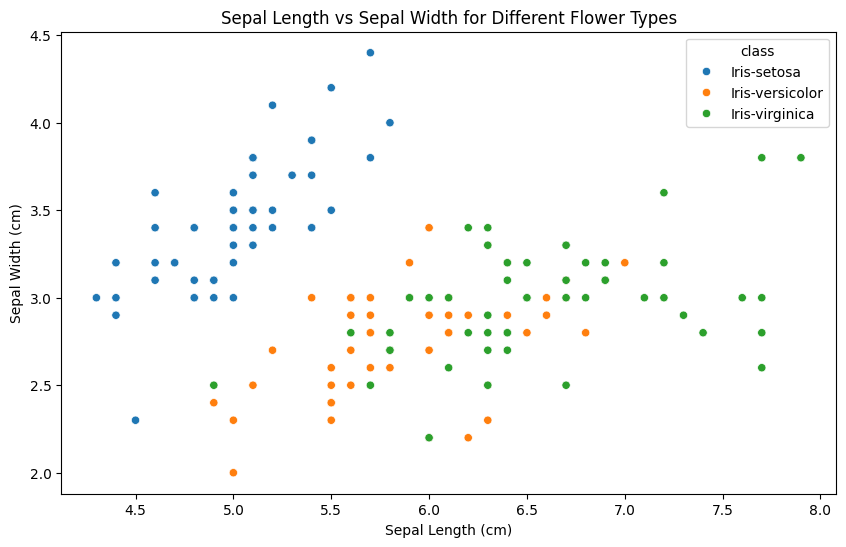

In [ ]:
# Creating a DataFrame for visualization purposes
data = pd.concat([X, y], axis=1)

# Plotting sepal length vs sepal width for each flower type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=data)
plt.title('Sepal Length vs Sepal Width for Different Flower Types')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()
# found that Iris Setosa is linearly separable from other two flower images when plotting for sepal length and width

In [ ]:
dataset = data[data['class'].isin(['Iris-setosa', 'Iris-virginica'])]
dataset = dataset.reset_index(drop=True)
input_features = dataset[['sepal length', 'sepal width']]
label = dataset['class'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)

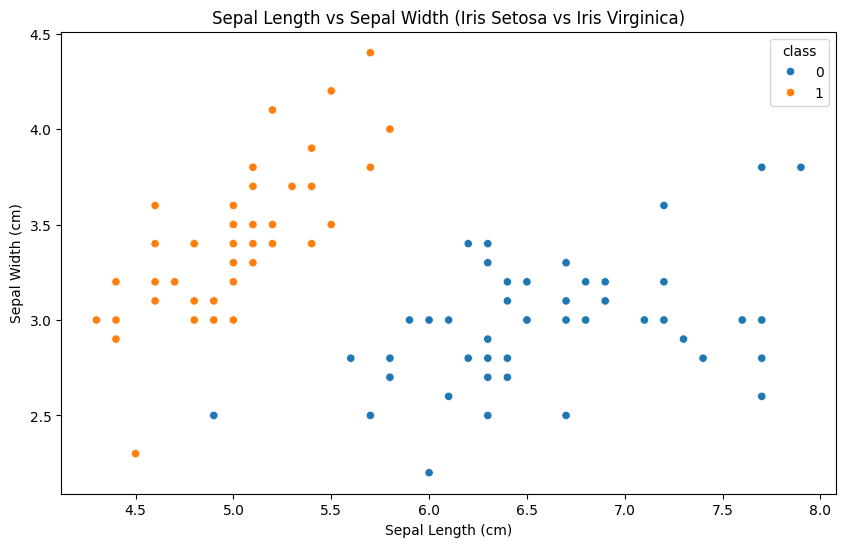

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length', y='sepal width', hue=label, data=input_features)
plt.title('Sepal Length vs Sepal Width (Iris Setosa vs Iris Virginica)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(input_features, label, test_size=0.2, stratify=label)
print(x_train, y_train)
print(y_train.value_counts())
print(y_train, y_test)
print(y_test.value_counts())

    sepal length  sepal width
62           6.8          3.0
52           7.1          3.0
92           5.8          2.7
39           5.1          3.4
60           6.5          3.2
..           ...          ...
19           5.1          3.8
6            4.6          3.4
71           5.6          2.8
99           5.9          3.0
72           7.7          2.8

[80 rows x 2 columns] 62    0
52    0
92    0
39    1
60    0
     ..
19    1
6     1
71    0
99    0
72    0
Name: class, Length: 80, dtype: int64
class
0    40
1    40
Name: count, dtype: int64
62    0
52    0
92    0
39    1
60    0
     ..
19    1
6     1
71    0
99    0
72    0
Name: class, Length: 80, dtype: int64 81    0
95    0
10    1
88    0
49    1
91    0
31    1
41    1
12    1
53    0
30    1
56    0
29    1
34    1
76    0
78    0
57    0
18    1
25    1
83    0
Name: class, dtype: int64
class
0    10
1    10
Name: count, dtype: int64


## **Logistic Regression**

### Setting up Hyperparameters

In [ ]:
# Setting the Hyperparameters
learning_rate = 0.1 # This is the initial Learning rate
epochs = 100 # Number of Iterations

### Randomizing the weights

In [ ]:
bias = np.random.randn(1)
print(bias)
weights = np.random.randn(2)
print(weights)

[0.57438066]
[0.68329466 0.91020565]


### Activation Function

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
# Arrays to store accuracy and loss values over epochs
train_accuracies = []
losses = []

# SGD Implementation
for epoch in range(epochs):
    for i in range(len(x_train)):
        # Get a single training example
        xi = x_train.iloc[i]
        yi = y_train.iloc[i]

        # Calculate prediction (forward pass)
        z = np.dot(xi, weights) + bias
        y_pred = sigmoid(z)

        # Calculate error
        error = y_pred - yi

        # Calculate gradients (MSE loss derivative*)
        dw = error * xi * sigmoid_derivative(z)
        db = error * sigmoid_derivative(z)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    # Calculate loss for the current epoch
    z_epoch = np.dot(x_train, weights) + bias
    y_pred_epoch = sigmoid(z_epoch)
    mse_loss = np.mean((y_pred_epoch - y_train) ** 2)
    losses.append(mse_loss)

    # Calculate accuracy for the current epoch
    y_pred_epoch_class = [1 if p >= 0.5 else 0 for p in y_pred_epoch]
    accuracy = np.mean(y_pred_epoch_class == y_train)
    train_accuracies.append(accuracy)

    # Print epoch info every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {mse_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Print final weights and bias
print(f"Final weights: {weights}, Final bias: {bias}")

Epoch: 0, Loss: 0.4995, Accuracy: 50.00%
Epoch: 10, Loss: 0.1769, Accuracy: 52.50%
Epoch: 20, Loss: 0.0420, Accuracy: 100.00%
Epoch: 30, Loss: 0.0248, Accuracy: 100.00%
Epoch: 40, Loss: 0.0181, Accuracy: 100.00%
Epoch: 50, Loss: 0.0145, Accuracy: 100.00%
Epoch: 60, Loss: 0.0123, Accuracy: 100.00%
Epoch: 70, Loss: 0.0107, Accuracy: 100.00%
Epoch: 80, Loss: 0.0096, Accuracy: 100.00%
Epoch: 90, Loss: 0.0087, Accuracy: 100.00%
Final weights: sepal length   -2.879407
sepal width     4.585084
Name: 62, dtype: float64, Final bias: [1.42484637]


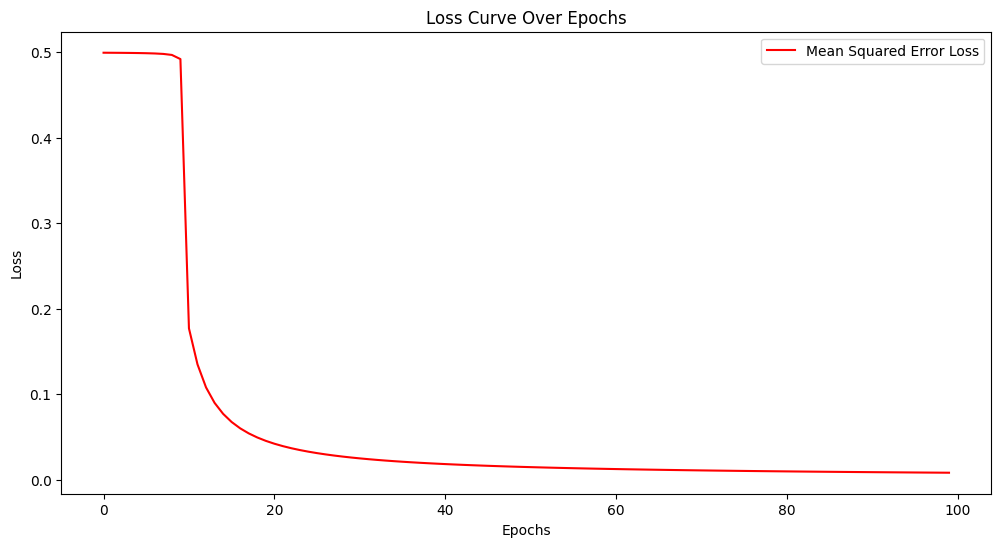

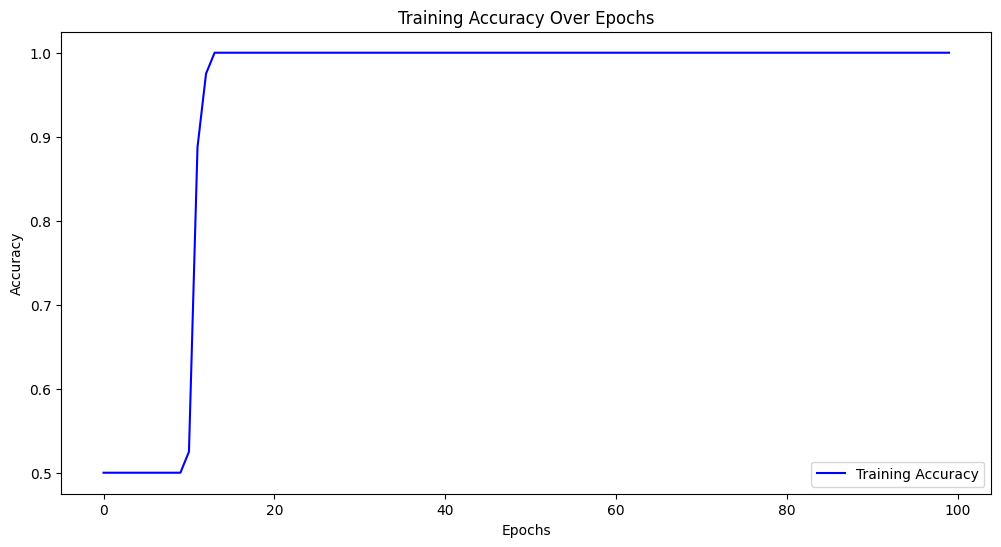

Final Training Accuracy: 100.00%


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), losses, label='Mean Squared Error Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Over Epochs')
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()
final_accuracy_percentage = train_accuracies[-1] * 100
print(f"Final Training Accuracy: {final_accuracy_percentage:.2f}%")

### Testing the accuracy

In [ ]:
# Predicting on the testing dataset
z_test = np.dot(x_test, weights) + bias
y_pred_test = sigmoid(z_test)

# Converting probabilities to binary predictions (threshold = 0.5)
y_pred_test_class = (y_pred_test >= 0.5).astype(int)

# Calculate accuracy on the testing dataset
test_accuracy = np.mean(y_pred_test_class == y_test.values)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Test Accuracy: 95.00%
